In [147]:
import os
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime
from packaging import version

In [148]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [149]:
import torch as T
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [150]:
from keras.datasets import cifar10

In [151]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [152]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [153]:
trainX=trainX/255.0
testX=testX/255.0

In [154]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir='logs', update_freq='epoch', write_graph=True, profile_batch=0)

In [155]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [157]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [158]:
cifar_model=model.fit(trainX, trainY, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
1563/1563 [==============================] - 335s 215ms/step - loss: 1.5680 - sparse_categorical_accuracy: 0.4243
Epoch 2/10
1563/1563 [==============================] - 365s 234ms/step - loss: 1.1269 - sparse_categorical_accuracy: 0.6032
Epoch 3/10
1563/1563 [==============================] - 365s 234ms/step - loss: 0.9386 - sparse_categorical_accuracy: 0.6729
Epoch 4/10
1563/1563 [==============================] - 364s 233ms/step - loss: 0.8414 - sparse_categorical_accuracy: 0.7092
Epoch 5/10
1563/1563 [==============================] - 417s 267ms/step - loss: 0.7698 - sparse_categorical_accuracy: 0.7322
Epoch 6/10
1563/1563 [==============================] - 476s 304ms/step - loss: 0.7250 - sparse_categorical_accuracy: 0.7464
Epoch 7/10
1563/1563 [==============================] - 482s 308ms/step - loss: 0.6789 - sparse_categorical_accuracy: 0.76232s - l
Epoch 8/10
1563/1563 [==============================] - 368s 235ms/step - loss: 0.6463 - sparse_categorical_accuracy: 0

In [159]:
model.save('final_model.h5')

In [160]:
cifar_model = keras.models.load_model('final_model.h5')

In [161]:
test_loss, test_accuracy = model.evaluate(testX, testY)

313/313 [==============================] - 17s 55ms/step - loss: 0.6502 - sparse_categorical_accuracy: 0.7830


In [162]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7829999923706055


In [163]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 78.300


In [164]:
model.metrics_names

['loss', 'sparse_categorical_accuracy']

In [165]:
y_pred = model.predict_classes(testX)

cm = confusion_matrix(testY, y_pred)

In [166]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

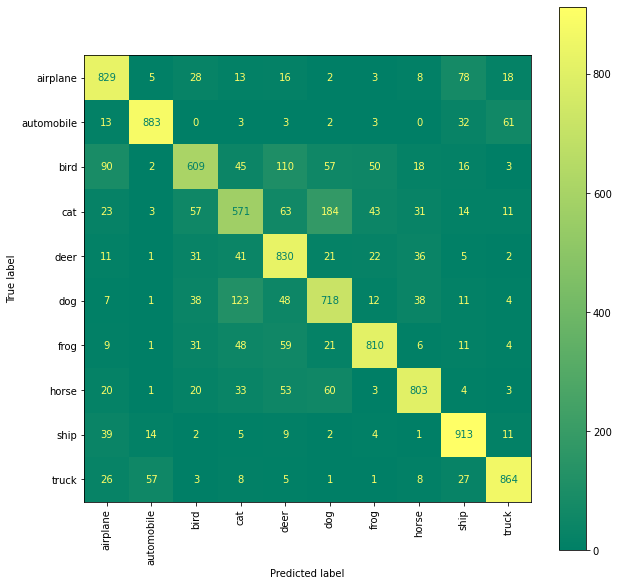

In [167]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [168]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.91      0.88      0.90      1000
           2       0.74      0.61      0.67      1000
           3       0.64      0.57      0.60      1000
           4       0.69      0.83      0.76      1000
           5       0.67      0.72      0.69      1000
           6       0.85      0.81      0.83      1000
           7       0.85      0.80      0.82      1000
           8       0.82      0.91      0.86      1000
           9       0.88      0.86      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



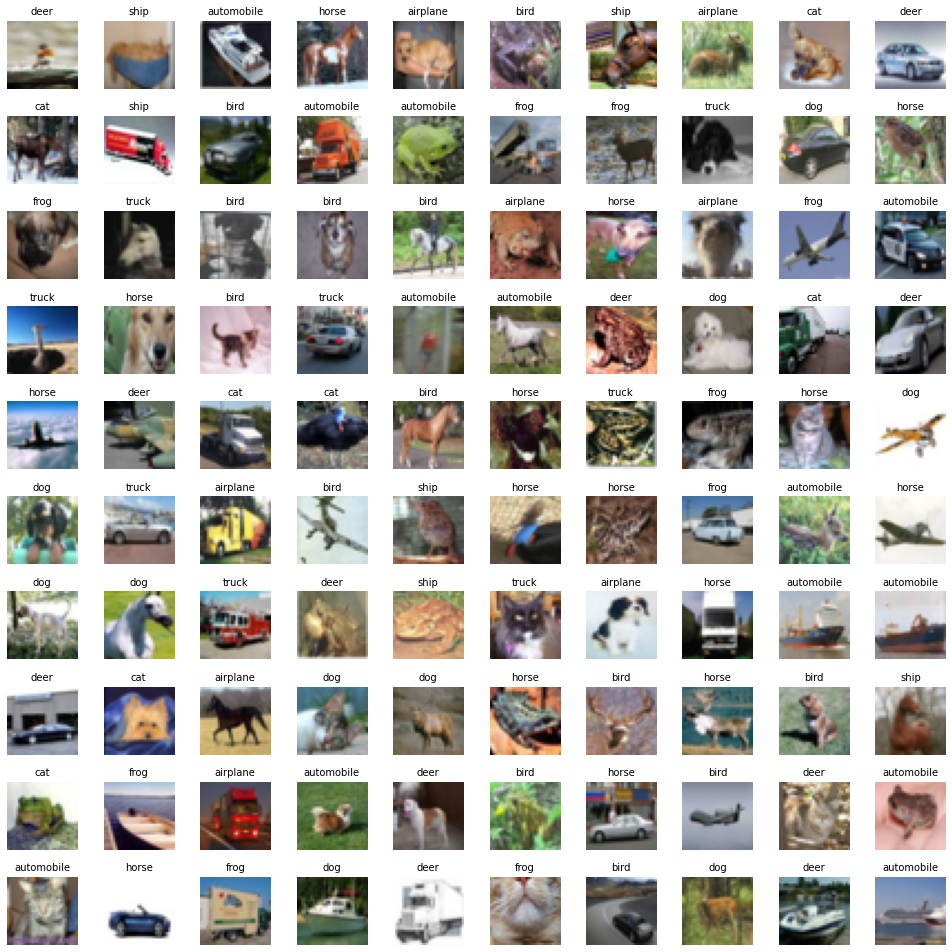

In [169]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(testX) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(A[index][0])
    label_index = int(A[index][1])
    axes[i].set_title(labels[label_index], fontsize = 10)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

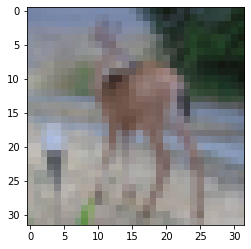

In [170]:
my_image = testX[100]
plt.imshow(my_image)

In [171]:
testY[100]

array([4])

In [188]:
y_pred.sort()

In [189]:
A=[]
for i in np.arange(0, len(testX)):
      A.append([testX[i, 1:], y_pred[i]])

In [190]:
count_class =[]
count=0
for j in range(0,10):
    for i in range(0, len(A)):
        if A[i][1]==j:
            count+=1
    count_class.append(count)
        

In [191]:
count_class

[1067, 2035, 2854, 3744, 4940, 6008, 6959, 7908, 9019, 10000]

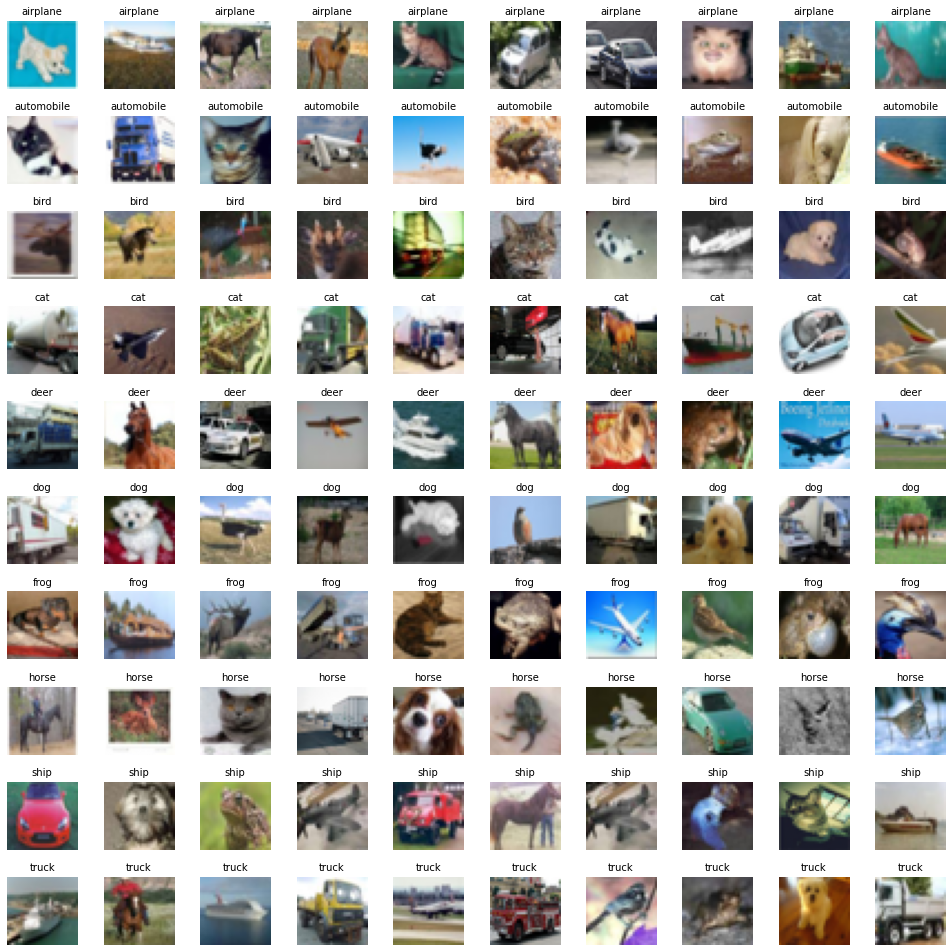

In [194]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
W_grid = 10
L_grid = 10
count=0
ig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_test = len(testX) # get the length of the train dataset
for i in np.arange(0, 100):    
    j=int(i/10)
    if(j==0):
        index = np.random.randint(0, count_class[j])
    else:
        index=np.random.randint(count_class[j-1], count_class[j])
    axes[i].imshow(A[index][0])
    label_index = int(A[index][1])
    axes[i].set_title(labels[label_index], fontsize = 10)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)